In [ ]:
# !pip install umap-learn
# !pip install hdbscan

In [2]:
# Data Science Tools
import bioinfokit as bik
from bioinfokit.analys import norm
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.io import mmread
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import TCRscape

# Dimension reduction and clustering libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import umap.umap_ as umap
import hdbscan

pd.options.mode.chained_assignment = None

In [3]:
Group_1_1 = TCRscape.ReadRhapsody('./SampleTag07_hs_RSEC_MolsPerCell_MEX','Group 1')
Group_1_2 = TCRscape.ReadRhapsody('./SampleTag10_hs_RSEC_MolsPerCell_MEX','Group 1')

Group_2_1 = TCRscape.ReadRhapsody('./SampleTag01_hs_RSEC_MolsPerCell_MEX','Group 2')
Group_2_2 = TCRscape.ReadRhapsody('./SampleTag12_hs_RSEC_MolsPerCell_MEX','Group 2')

Group_3_1 = TCRscape.ReadRhapsody('./SampleTag08_hs_RSEC_MolsPerCell_MEX','Group 3')
Group_3_2 = TCRscape.ReadRhapsody('./SampleTag09_hs_RSEC_MolsPerCell_MEX','Group 3')

In [4]:
merged = TCRscape.MergeRhapsody([Group_1_1,Group_1_2,Group_2_1,Group_2_2,Group_3_1,Group_3_2])
merged

,ADA,ADGRE1,ADGRG3,AIM2,ANXA5,AOC3,APOBEC3G,AQP9,ARG1,ARL4C,...,IL25,S100A12,THBD,TREM1,VPREB3,CCL2,BPI,CCR10,CD1B,PI3
Cell_Index,,,,,,,,,,,,,,,,,,,,,
50084,7,0,0,0,9,0,0,0,1.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56865,7,0,0,1,3,0,6,0,0.0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59557,1,0,0,0,0,0,10,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61317,7,0,0,3,6,0,9,0,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77731,0,0,0,6,3,0,1,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56530650,8,0,0,1,4,0,8,0,0.0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56532319,1,0,0,0,0,0,12,0,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56565145,5,0,0,0,3,0,9,0,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
norm =  TCRscape.LogNormalize(merged)
norm

,ADA,ADGRE1,ADGRG3,AIM2,ANXA5,AOC3,APOBEC3G,AQP9,ARG1,ARL4C,...,TREM1,VPREB3,CCL2,BPI,CCR10,CD1B,PI3,Sample_Group 1,Sample_Group 2,Sample_Group 3
Cell_Index,,,,,,,,,,,,,,,,,,,,,
50084,6.080452,0.0,0.0,0.000000,6.331766,0.0,0.000000,0.0,4.134542,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
56865,6.345694,0.0,0.0,4.399783,5.498396,0.0,6.191543,0.0,0.000000,5.092931,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
59557,4.863941,0.0,0.0,0.000000,0.000000,0.0,7.166526,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
61317,5.473011,0.0,0.0,4.625713,5.318860,0.0,5.724325,0.0,0.000000,3.527101,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
77731,0.000000,0.0,0.0,6.063319,5.370171,0.0,4.271559,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56530650,6.224027,0.0,0.0,4.144586,5.530880,0.0,6.224027,0.0,0.000000,5.243198,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
56532319,4.295482,0.0,0.0,0.000000,0.000000,0.0,6.780389,0.0,0.000000,4.295482,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
56565145,5.847884,0.0,0.0,0.000000,5.337058,0.0,6.435670,0.0,0.000000,4.238446,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [6]:
T = TCRscape.GateTcells(norm)
T

,ADA,ADGRE1,ADGRG3,AIM2,ANXA5,AOC3,APOBEC3G,AQP9,ARG1,ARL4C,...,TREM1,VPREB3,CCL2,BPI,CCR10,CD1B,PI3,Sample_Group 1,Sample_Group 2,Sample_Group 3
Cell_Index,,,,,,,,,,,,,,,,,,,,,
50084,6.080452,0.0,0.0,0.000000,6.331766,0.0,0.000000,0.0,4.134542,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
56865,6.345694,0.0,0.0,4.399783,5.498396,0.0,6.191543,0.0,0.000000,5.092931,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
59557,4.863941,0.0,0.0,0.000000,0.000000,0.0,7.166526,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
61317,5.473011,0.0,0.0,4.625713,5.318860,0.0,5.724325,0.0,0.000000,3.527101,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
77731,0.000000,0.0,0.0,6.063319,5.370171,0.0,4.271559,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56530650,6.224027,0.0,0.0,4.144586,5.530880,0.0,6.224027,0.0,0.000000,5.243198,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
56532319,4.295482,0.0,0.0,0.000000,0.000000,0.0,6.780389,0.0,0.000000,4.295482,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
56565145,5.847884,0.0,0.0,0.000000,5.337058,0.0,6.435670,0.0,0.000000,4.238446,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [7]:
CD4 = TCRscape.GateCD4(T)
CD4

,ADA,ADGRE1,ADGRG3,AIM2,ANXA5,AOC3,APOBEC3G,AQP9,ARG1,ARL4C,...,TREM1,VPREB3,CCL2,BPI,CCR10,CD1B,PI3,Sample_Group 1,Sample_Group 2,Sample_Group 3
Cell_Index,,,,,,,,,,,,,,,,,,,,,
77731,0.000000,0.000000,0.0,6.063319,5.370171,0.0,4.271559,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
201392,5.266819,0.000000,0.0,0.000000,6.183109,0.0,6.653113,0.0,0.0,4.573672,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
457038,5.648111,0.000000,0.0,0.000000,5.109115,0.0,6.107644,0.0,0.0,3.856352,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
468184,6.094605,4.015164,0.0,0.000000,7.150658,0.0,4.708311,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
534585,5.530430,0.000000,0.0,0.000000,6.417733,0.0,5.530430,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55823501,0.000000,0.000000,0.0,4.403046,5.789340,0.0,5.789340,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
56389437,5.319541,0.000000,0.0,0.000000,6.928979,0.0,6.418153,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
56390205,4.730167,0.000000,0.0,0.000000,6.601969,0.0,5.982930,0.0,0.0,4.037019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [8]:
CD8 = TCRscape.GateCD8(T)
CD8

,ADA,ADGRE1,ADGRG3,AIM2,ANXA5,AOC3,APOBEC3G,AQP9,ARG1,ARL4C,...,TREM1,VPREB3,CCL2,BPI,CCR10,CD1B,PI3,Sample_Group 1,Sample_Group 2,Sample_Group 3
Cell_Index,,,,,,,,,,,,,,,,,,,,,
50084,6.080452,0.0,0.0,0.000000,6.331766,0.0,0.000000,0.0,4.134542,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
56865,6.345694,0.0,0.0,4.399783,5.498396,0.0,6.191543,0.0,0.000000,5.092931,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
59557,4.863941,0.0,0.0,0.000000,0.000000,0.0,7.166526,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
61317,5.473011,0.0,0.0,4.625713,5.318860,0.0,5.724325,0.0,0.000000,3.527101,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
77731,0.000000,0.0,0.0,6.063319,5.370171,0.0,4.271559,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56530650,6.224027,0.0,0.0,4.144586,5.530880,0.0,6.224027,0.0,0.000000,5.243198,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
56532319,4.295482,0.0,0.0,0.000000,0.000000,0.0,6.780389,0.0,0.000000,4.295482,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
56565145,5.847884,0.0,0.0,0.000000,5.337058,0.0,6.435670,0.0,0.000000,4.238446,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [9]:
AIRR = pd.read_csv("Dominant_Contigs_AIRR.tsv",
                 sep='\t',
                 low_memory=False)

AIRR['cell_id'] = AIRR['cell_id'].dropna()
AIRR['locus'] = AIRR['locus'].dropna()
AIRR['sequence_aa'] = AIRR['sequence_aa'].dropna()
AIRR['sequence_aa'] = AIRR['sequence_aa'].astype(str)
AIRR['cdr3_aa'] = AIRR['cdr3_aa'].dropna()
AIRR['sequence_aa'] = AIRR['sequence_aa'].astype(str)

AIRR

,cell_id,cell_type_experimental,high_quality_cell,locus,sequence_id,consensus_count,umi_count,sequence,sequence_length,sequence_aa,...,fwr3,fwr3_aa,fwr4,fwr4_aa,cdr1,cdr1_aa,cdr2,cdr2_aa,cdr3,cdr3_aa
0,25,T_CD8_memory,False,TRB,25_TRB_7,467,2,TTGTTTTGTTTTGTTTGTTAAGCTCTTTCCTGGACTCTTTCTACAG...,485,CFVLFVKLFPGLFLQHLFLSLTDSFHAKVTQTPGHLVKGKGQKTKM...,...,CTTCAAGAAACGGAGATGCACAAGAAGCGATTCTCATCTCAATGCC...,LQETEMHKKRFSSQCPKNAPCSLAILSSEPGDTALYLC,TTTGGTGATGGGACTCGACTCTCCATCCTA,W*WDSTLHP,AAAGGACATACTTTT,KGHTF,TTTCAGAATGAACAAGTT,FQNEQV,GCCAGCAGTCACCCGGTGGGGGCGAAATCAGCCCCAGCAT,ASSHPVGAKSAPA
1,1454,T_CD8_memory,True,TRB,1454_TRB_1,284,6,GGGATGCTTACTACAGAGACACCAGCCCCAAGCTAGGAGATCCTGC...,506,DAYYRDTSPKLGDPAMGFRLLCCVAFCLLGAGPVDSGVTQTPKHLI...,...,AGAGCAAAAGGAAACATTCTTGAACGATTCTCCGCACAACAGTTCC...,RAKGNILERFSAQQFPDLHSELNLSSLELGDSALYFC,TTCGGGCCGGGCACCAGGCTCACGGTCACA,FGPGTRLTVT,TCTGGAGACCTCTCT,SGDLS,TATTATAATGGAGAAGAG,YYNGEE,GCCAGCAGCGTAGCTTACAGGGGCCACGAGCAGTAC,ASSVAYRGHEQY
2,1613,T_CD8_memory,True,TRA,1613_TRA_1,4763,37,GGGGATCCACTGAGCCTCCTCCCTGCAGCTGGCTGATGTAGCTCAC...,738,GDPLSLLPAAG*CSSLVSV*IGSCDENKRSEHIQAP*EKAFL*PFL...,...,AAAGGCATCAACGGTTTTGAGGCTGAATTTAAGAAGAGTGAAACCT...,KGINGFEAEFKKSETSFHLTKPSAHMSDAAEYFC,TTTGGCCAAGGAACCAGGCTGACTATCAACCCA,FGQGTRLTINP,TCGTCTGTTCCACCATAT,SSVPPY,TACACATCAGCGGCCACCCTGGTT,YTSAATLV,GCTGCTCAGGGAGCCCAGAAGCTGGTA,AAQGAQKLV
3,1613,T_CD8_memory,True,TRB,1613_TRB_1,5488,41,GTATGGGGGAAGCATTTGTGGAGACAATGATGTCACTGTAGGAACT...,607,YGGSICGDNDVTVGTSL*GQQHPTSSAPAHSDPDLAKLPSCPDPAM...,...,GTAGACGATTCACAGTTGCCTAAGGATCGATTTTCTGCAGAGAGGC...,VDDSQLPKDRFSAERLKGVDSTLKIQPAELGDSAVYLC,TTCGGTTCGGGGACCAGGTTAACCGTTGTA,FGSGTRLTVV,TCTGGCCACAATACC,SGHNT,TATGAGAATGAGGAAGCA,YENEEA,GCCAGCAGCTTTAGTGTTAGGGACCAACGAGACTATGGCTACACC,ASSFSVRDQRDYGYT
4,2726,T_CD8_memory,True,TRA,2726_TRA_1,265,3,TGCATCCACCGAATTATTCGTTGTAGTTATGGGGGATCCAGACTGA...,609,CIHRIIRCSYGGSRLSFLPSPT*SVYLLQTPMAQELGMQCQARGIL...,...,GAGGAGAAAGGTCGTTTTTCTTCATTCCTTAGTCGGTCTAAAGGGT...,EEKGRFSSFLSRSKGYSYLLLKELQMKDSASYLC,TTTGGAAAGGGCACAAGACTTTCTGTGATTGCA,FGKGTRLSVIA,ACATCTGGGTTCAACGGG,TSGFNG,AATGTTCTGGATGGTTTG,NVLDGL,GCTGGGTATTCAGGAAACACACCTCTTGTC,AGYSGNTPLV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67175,56617667,T_gamma_delta,True,TRG,56617667_TRG_1,2659,27,CTGCTGTGGGACTGCCCCCTCCTAGGGCTGGGCCTGCTGACTCCAG...,846,AVGLPPPRAGPADSRVCFPHLCTPSAAGLSSPCPWLSSAEGLLSAA...,...,GTGTTGGAATCAGGAGTCAGTCCAGGGAAGTATTATACTTACGCAA...,VLESGVSPGKYYTYASTRNNLRLILRNLIENDSGVYYC,TTTGGCAGTGGAACAACACTTGTTGTCACA,FGSGTTLVVT,GAAGGAAGTAACGGCTAC,EGSNGY,TATGACTCCTACAACTCCAAGGTT,YDSYNSKV,GCCACCTGGGACGGGCAAGGTTATAAGAAACTC,ATWDGQGYKKL
67176,56618448,T_CD8_memory,True,TRA,56618448_TRA_1,2074,24,GTATGGGGGATTCTTACCAAAACAAGAGACTTGCCTAGCCCAACCT...,637,YGGFLPKQETCLAQPSSRSLFSRPGFQPLSYWPRGEFPKRRLQCFH...,...,AAAGGCATCAAGGGCTTTGAGGCTGAATTTATAAAGAGTAAATTCT...,KGIKGFEAEFIKSKFSFNLRKPSVQWSDTAEYFC,TTTGGAAGAGGAACTCAGTTGACTGTCTGGCCT,FGRGTQLTVWP,TATGGTGGAACTGTTAAT,YGGTVN,TACTTTTCAGGGGATCCACTGGTT,YFSGDPLV,GCCGTGATTCCCCCAGGCTCAACCCTGGGGAGGCTATAC,AVIPPGSTLGRLY
67177,56618448,T_CD8_memory,True,TRB,56618448_TRB_2,18130,91,TATGGGGGCTGTCCTGTCTCCTCATCTGCAAAATTAGGAAGCCTGT...,649,MGAVLSPHLQN*EACLDYLQEPPTSSFQPLTNSAH*ARRSPRAKSL...,...,TTTCAGAAAGGAGATATAGCTGAAGGGTACAGCGTCTCTCGGGAGA...,FQKGDIAEGYSVSREKKESFPLTVTSAQKNPTAFYLC,TTCGGGCCGGGCACCAGGCTCACGGTCACA,FGPGTRLTVT,TTGAACCACGATGCC,LNHDA,TCACAGATAGTAAATGAC,SQIVND,GCCAGTAATTCCGTATGGGGAGGCGAGCAGTAC,ASNSVWGGEQY
67178,56619358,T_CD8_memory,True,TRA,56619358_TRA_1,322,9,GGGAGTGATGCCCTCTGCTAGGCCAGAGACACTAACAATGAACTCC...,490,GVMPSARPETLTMNSSLDFLILILMFGGTSSNSVKQTGQITVSEGA...,...,AACAGCAAAAACTTCGGAGGCGGAAATATTAAAGACAAAAACTCCC...,NSKNFGGGNIKDKNSPIVKYSVQVSDSAVYYC,TTTGGCGCAGGAACCATTCTGAGAGTCAAGTCC,FGAGTILRVKS,TCCACGGGGTACCCTACC,STGYPT,GAGACAATGGAA,ETME,CTTCTGGAATATGGAAACAAGCTGGTC,LLEYGNKLV


In [10]:
Group_1_T = T[T['Sample_Group 1'] == 1]
Group_2_T = T[T['Sample_Group 2'] == 1]
Group_3_T = T[T['Sample_Group 3'] == 1]

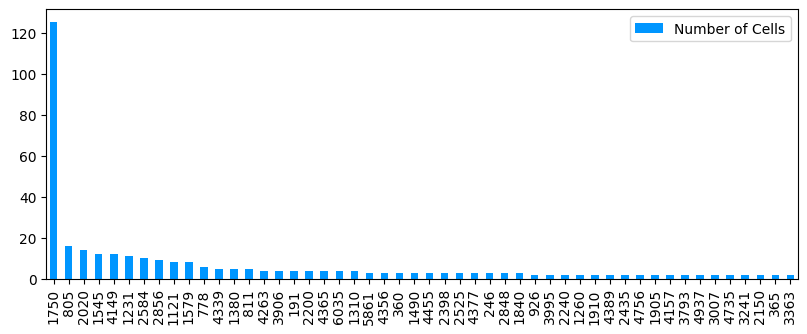

In [11]:
Counts = TCRscape.CountCDR3(Group_1_T, AIRR)

# Visualize and save Top 50 AB-Clonotypes
vis = Counts.iloc[:50,:]
vis.plot(kind='bar',y='Number of Cells',color='#0096FF',figsize=(9.7,3.5))
plt.savefig('CDR3 Counts.png', dpi=600, bbox_inches='tight')
# AB_counts.to_excel('Clonotypes.xlsx')
Counts.to_csv('CDR3 Counts.csv')
plt.show()

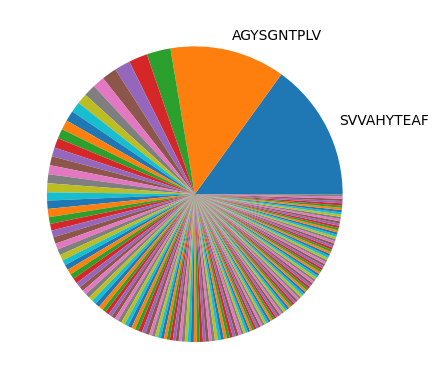

In [12]:
# CDR3 filter - minimum number of cells with the same CDR3 
min_CDR3 = 3

# Optional - Remove non top-X CDR3s
CDR3_top = 2

Pie = TCRscape.CDR3pie(Group_1_T, AIRR, min_CDR3, CDR3_top)

In [13]:
T

,ADA,ADGRE1,ADGRG3,AIM2,ANXA5,AOC3,APOBEC3G,AQP9,ARG1,ARL4C,...,TREM1,VPREB3,CCL2,BPI,CCR10,CD1B,PI3,Sample_Group 1,Sample_Group 2,Sample_Group 3
Cell_Index,,,,,,,,,,,,,,,,,,,,,
50084,6.080452,0.0,0.0,0.000000,6.331766,0.0,0.000000,0.0,4.134542,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
56865,6.345694,0.0,0.0,4.399783,5.498396,0.0,6.191543,0.0,0.000000,5.092931,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
59557,4.863941,0.0,0.0,0.000000,0.000000,0.0,7.166526,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
61317,5.473011,0.0,0.0,4.625713,5.318860,0.0,5.724325,0.0,0.000000,3.527101,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
77731,0.000000,0.0,0.0,6.063319,5.370171,0.0,4.271559,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56530650,6.224027,0.0,0.0,4.144586,5.530880,0.0,6.224027,0.0,0.000000,5.243198,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
56532319,4.295482,0.0,0.0,0.000000,0.000000,0.0,6.780389,0.0,0.000000,4.295482,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
56565145,5.847884,0.0,0.0,0.000000,5.337058,0.0,6.435670,0.0,0.000000,4.238446,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [14]:
# Minimum clonotypes
min_clones = 1

# Featurs to use for clustering
features_to_cluster = ['CD4', 'CD8A', 'NKG7', # T-cell type
                       'FOXP3', # Treg
                       # 'SELL','IL7R','CCR7', 'IL2RA', # T-cell type markers
                       'Sample_Group 1','Sample_Group 2','Sample_Group 3'
                      ]

In [15]:
df = TCRscape.TCRscape(T, AIRR, features_to_cluster, min_clones)
df

,CD4,CD8A,NKG7,FOXP3,Sample_Group 1,Sample_Group 2,Sample_Group 3,Number of Cells,TCR_Type,Clonotype_TRA_AAKQEVTQIPAALSVPEGENLVLNCSFTDSAIYNLQWFRQDPGKGLTSLLLIQSSQREQTSGRLNASLDKSSGRSTLYIAASQPGDSATYLCAAPDIADGLTFGKGTHLIIQPYIQKPDPAVYQLRDSKSSDKSVCLFTDFD___TRB_MGIRLLCRVAFCFLAVGLVDVKVTQSSRYLVKRTGEKVFLECVQDMDHENMFWYRQDPGLGLRLIYFSYDVKMKEKGDIPEGYSVSREKKERFSLILESASTNQTSMYLCASSFDGRATGYTFGSGTRLTVVEDLNKVFPPEVAVFEPSEAEISHTQKATLVCLATGFFPDHVELSWWVNGKEVHSGVSTDPQPLKEQPALNDSRYCLSSRLRVSATFWQNPRNHFRCQVQFYGLSENDEWTQDRAKPVTQIVSAEAWGRADCGFTSVSYQQGVLSATILYEILLGKATLYAVLVSALVLMAMVKRKDF,...,TRDV_TRDV3*02,TRDD_TRDD2*01,TRDD_TRDD3*01,TRDJ_TRAJ18*01,TRDJ_TRAJ39*01,TRDJ_TRAJ44*01,TRDJ_TRDJ1*01,TRDJ_TRDJ2*01,TRDJ_TRDJ3*01,TRDJ_TRDJ4*01
Cell_Index,,,,,,,,,,,,,,,,,,,,,
50084,0.000000,7.660902,7.078981,0.000000,1.0,0.0,0.0,92,1,0,...,0,0,0,0,0,0,0,0,0,0
56865,0.000000,7.535278,6.479225,0.000000,1.0,0.0,0.0,92,1,0,...,0,0,0,0,0,0,0,0,0,0
61317,0.000000,7.288301,6.822938,3.527101,1.0,0.0,0.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
88775,0.000000,7.671868,8.103799,3.899107,1.0,0.0,0.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
201392,5.672284,4.573672,7.406885,0.000000,1.0,0.0,0.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56530650,0.000000,7.235628,6.447171,0.000000,0.0,0.0,1.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
56532319,0.000000,6.934539,7.340004,4.988629,0.0,0.0,1.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
56565145,0.000000,7.011035,6.435670,0.000000,0.0,0.0,1.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


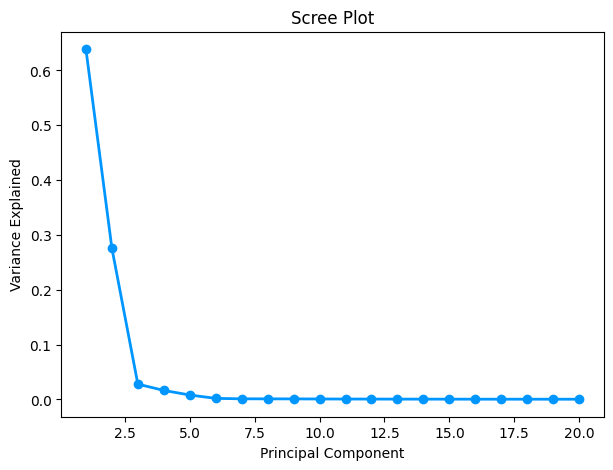

In [19]:
X = df.drop(columns=['Sample_Group 1', 'Sample_Group 2', 'Sample_Group 3']) # Remove the meta data
# X = StandardScaler().fit_transform(X) # Gives bad clusters sometimes

# Plot background color
plt.rcParams['axes.facecolor'] = 'white'
# plt.rcParams['axes.facecolor'] = 'black'

# PCA
pca = PCA(n_components=20)
pca_fit = pca.fit(X.T)
PC_values = np.arange(pca.n_components_) + 1
plt.figure(figsize=(7,5))
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='#0096FF')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.savefig('Scree Plot.png', dpi=600, bbox_inches='tight')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/opt/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/var/folders/lk/54m90rgj1fqg895lxsgx1l180000gn/T/ipykernel_18835/1391967424.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],


Text(0, 0.5, 'UMAP 2')

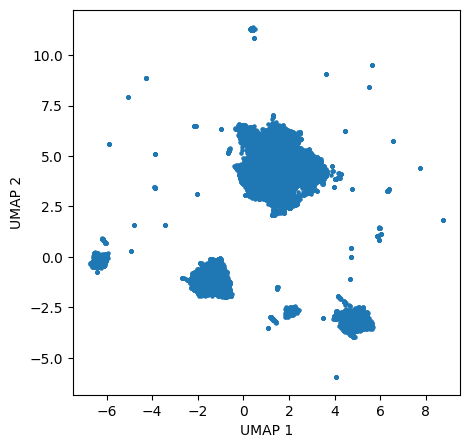

In [18]:
n_components = 5 # From the Scree Plot

# UMAP
clusterable_embedding = umap.UMAP(
                                  n_neighbors=5,
                                  min_dist=0.1,
                                  n_components=n_components,
                                  random_state=14,
                                 ).fit_transform(X)
plt.figure(figsize=(5,5))
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],
             s=5, cmap='Spectral')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

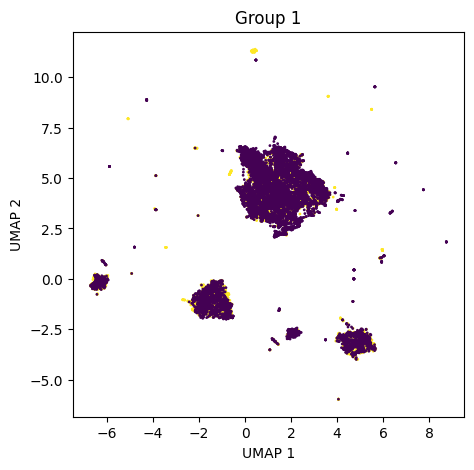

In [20]:
#UMAP Feature plot

feature = df["Sample_Group 1"]

plt.figure(figsize=(5.05,5))
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],
            c = feature, cmap = "viridis", s = 1)

plt.title("Group 1")
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

plt.savefig('TCRscape Group 1.png', dpi=600, bbox_inches='tight')

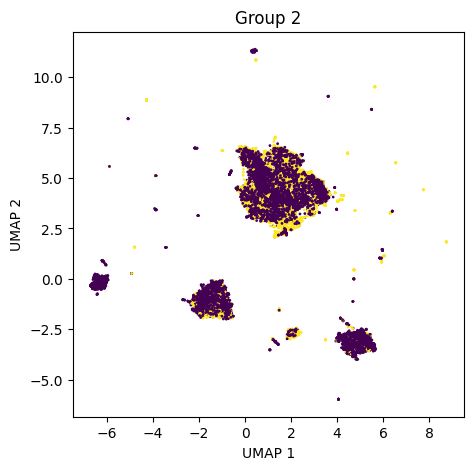

In [21]:
#UMAP Feature plot

feature = df["Sample_Group 2"]

plt.figure(figsize=(5.05,5))
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],
            c = feature, cmap = "viridis", s = 1)

plt.title("Group 2")
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

plt.savefig('TCRscape Group 2.png', dpi=600, bbox_inches='tight')

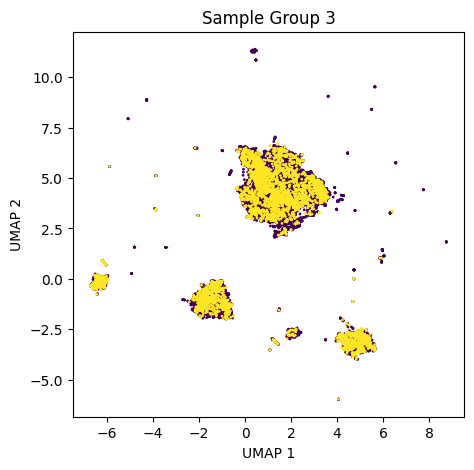

In [22]:
#UMAP Feature plot

feature = df["Sample_Group 3"]

plt.figure(figsize=(5.05,5))
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],
            c = feature, cmap = "viridis", s = 1)

plt.title("Sample Group 3")
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

plt.savefig('TCRscape Group 3.png', dpi=600, bbox_inches='tight')

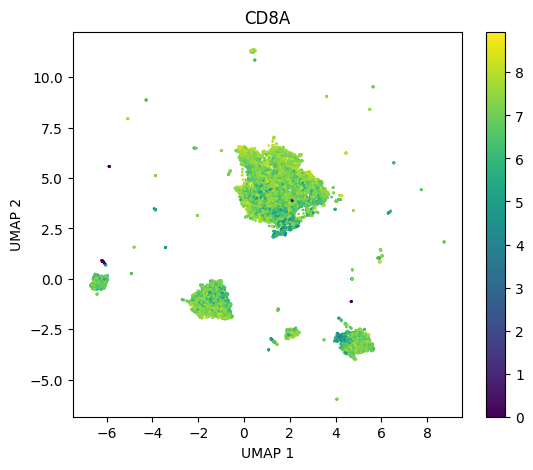

In [23]:
#UMAP Feature plot

feature = df["CD8A"]

plt.figure(figsize=(6.275,5))
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],
            c = feature, cmap = "viridis", s = 1)

plt.title("CD8A")
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

plt.colorbar()

plt.savefig('TCRscape CD8A.png', dpi=600, bbox_inches='tight')

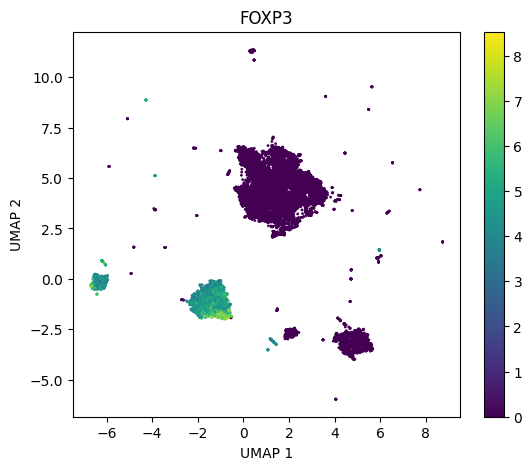

In [24]:
#UMAP Feature plot

feature = df["FOXP3"]

plt.figure(figsize=(6.25,5))
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],
            c = feature, cmap = "viridis", s = 1)

plt.title("FOXP3")
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

plt.colorbar()

plt.savefig('TCRscape FOXP3.png', dpi=600, bbox_inches='tight')

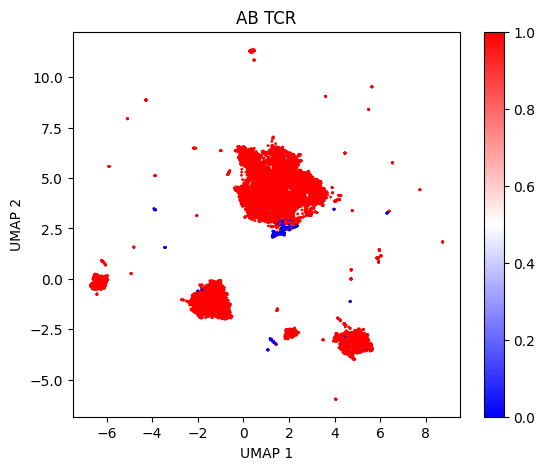

In [25]:
#UMAP Feature plot

feature = df["TCR_Type"]


plt.figure(figsize=(6.25,5))
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],
            c = feature, cmap = "bwr", s = 1)

plt.title("AB TCR")
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

plt.colorbar()

plt.savefig('TCRscape TCR Type.png', dpi=600, bbox_inches='tight')

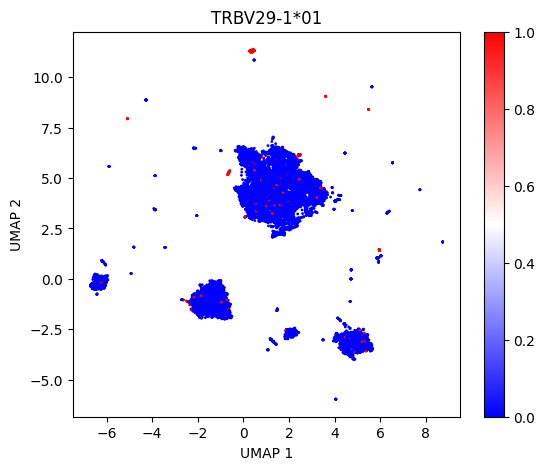

In [29]:
#UMAP Feature plot

feature = df["TRBV_TRBV29-1*01"]


plt.figure(figsize=(6.25,5))
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],
            c = feature, cmap = "bwr", s = 1)

plt.title("TRBV29-1*01")
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

plt.colorbar()

plt.savefig('TCRscape TRBV29-1*01.png', dpi=600, bbox_inches='tight')

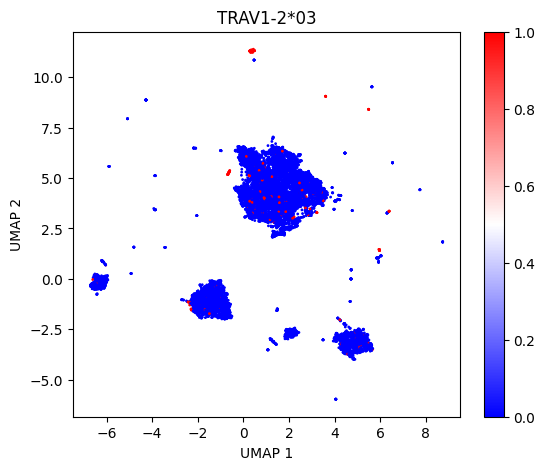

In [28]:
#UMAP Feature plot

feature = df["TRAV_TRAV1-2*03"]


plt.figure(figsize=(6.25,5))
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],
            c = feature, cmap = "bwr", s = 1)

plt.title("TRAV1-2*03")
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

plt.colorbar()

plt.savefig('TCRscape TRAV1-2*03.png', dpi=600, bbox_inches='tight')

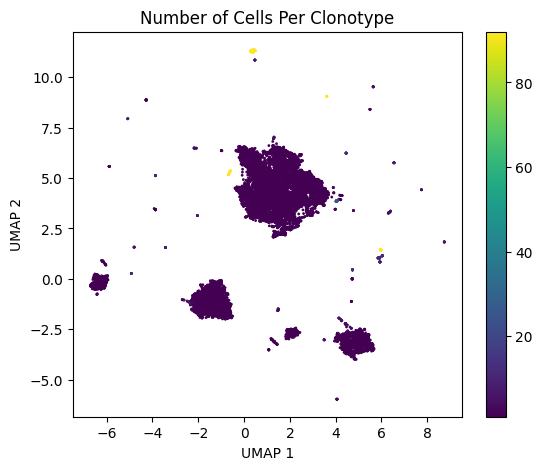

In [26]:
#UMAP Feature plot

feature = df["Number of Cells"]

plt.figure(figsize=(6.278,5))
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],
            c = feature, cmap = "viridis", s = 1)

plt.title("Number of Cells Per Clonotype")
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

plt.colorbar()

plt.savefig('TCRscape Number of Cells Per Clonotype.png', dpi=600, bbox_inches='tight')

## Export clonotype data per Sample to Seurat

In [27]:
sample = Group_1_1

Cell_Index = sample.reset_index()
Cell_Index = Cell_Index[["Cell_Index"]]
Cell_Index.set_index(['Cell_Index'], inplace=True)

sample_clonotype = pd.merge(Cell_Index,df,how='left',left_index=True, right_index=True)
sample_clonotype = sample_clonotype.fillna(0)
sample_clonotype.to_csv('Group_1_1 Clonotypes.csv')
sample_clonotype

,CD4,CD8A,NKG7,FOXP3,Sample_Group 1,Sample_Group 2,Sample_Group 3,Number of Cells,TCR_Type,Clonotype_TRA_AAKQEVTQIPAALSVPEGENLVLNCSFTDSAIYNLQWFRQDPGKGLTSLLLIQSSQREQTSGRLNASLDKSSGRSTLYIAASQPGDSATYLCAAPDIADGLTFGKGTHLIIQPYIQKPDPAVYQLRDSKSSDKSVCLFTDFD___TRB_MGIRLLCRVAFCFLAVGLVDVKVTQSSRYLVKRTGEKVFLECVQDMDHENMFWYRQDPGLGLRLIYFSYDVKMKEKGDIPEGYSVSREKKERFSLILESASTNQTSMYLCASSFDGRATGYTFGSGTRLTVVEDLNKVFPPEVAVFEPSEAEISHTQKATLVCLATGFFPDHVELSWWVNGKEVHSGVSTDPQPLKEQPALNDSRYCLSSRLRVSATFWQNPRNHFRCQVQFYGLSENDEWTQDRAKPVTQIVSAEAWGRADCGFTSVSYQQGVLSATILYEILLGKATLYAVLVSALVLMAMVKRKDF,...,TRDV_TRDV3*02,TRDD_TRDD2*01,TRDD_TRDD3*01,TRDJ_TRAJ18*01,TRDJ_TRAJ39*01,TRDJ_TRAJ44*01,TRDJ_TRDJ1*01,TRDJ_TRDJ2*01,TRDJ_TRDJ3*01,TRDJ_TRDJ4*01
Cell_Index,,,,,,,,,,,,,,,,,,,,,
50084,0.0,7.660902,7.078981,0.000000,1.0,0.0,0.0,92.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56865,0.0,7.535278,6.479225,0.000000,1.0,0.0,0.0,92.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59557,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61317,0.0,7.288301,6.822938,3.527101,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77731,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56532160,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56535597,0.0,7.430415,7.338042,0.000000,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56544070,0.0,7.475287,7.395244,0.000000,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
